**Nombre:** Edgar Omar Macías Mota
**Matrícula:** al03019260
**Nombre del curso:**
Aprendizaje Automático
**Nombre del profesor:**
Rolando Evelio Pérez Verson
**Módulo:**
Módulo 3
**Actividad:** 10
**Fecha:** 30 de julio de 2022

## Actividad 10
Se presenta a continuación el desarrollo de la actividad 10 del curso.

1. Inicia un nuevo documento de Jupyter Notebook e importa a tu entorno de trabajo el conjunto de datos con la información de las características de la flor iris (iris_dataset), que se encuentra integrado en la librería Scikit-learn.
2. Utilizando como base el conjunto de datos importado en el paso anterior, elabora un programa en Python que realice el agrupamiento de dichos datos, utilizando el algoritmo k-means. Selecciona varios valores de k como parámetro inicial y comprueba los resultados obtenidos con los valores conocidos de las muestras previamente clasificadas.
3. Repite la pregunta anterior, pero en esta ocasión utiliza el agrupamiento jerárquico aglomerativo, genera el dendrograma correspondiente utilizando el método de linkage completo y realiza el análisis de los índices silhouette para seleccionar el número óptimo de clústeres.
4. Con el número de clústeres obtenido en el punto 3, implementa el agrupamiento c-means difuso con el mismo conjunto de datos base. Modifica algunos parámetros de inicialización (criterio de terminación/grado de difusividad) y repite el experimento anterior al menos en 2 nuevas ocasiones.
5. Grafica con el apoyo de Matplotlib las agrupaciones realizadas en los puntos 2 a 4 e incorpora en cada gráfica los centroides calculados por cada algoritmo.
6. Elabora una conclusión a partir de los resultados obtenidos sobre las ventajas y desventajas de la selección de cualquiera de estos métodos de agrupamiento ante un conjunto de datos con características similares al analizado en esta actividad.

Instalando las librerías necesarias

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from fcmeans import FCM
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
#Cargando los datos de iris
iris = load_iris()
X = iris.data[:, :2] #Tomando los primeros 2 features
y = iris.target

Graficando el contenido

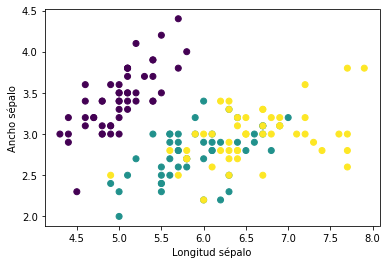

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Longitud sépalo")
plt.ylabel("Ancho sépalo")
plt.show()

## Usando agrupamiento con K-Means

In [5]:
#Probando con 3 clusters
modelo_kmean = KMeans(n_clusters=3, n_init=25, random_state=123)
modelo_kmean.fit(X)
y_predict = modelo_kmean.predict(X)

In [6]:
#Probando con 2 clusters
modelo_kmean_2 = KMeans(n_clusters=2, n_init=25, random_state=123)
modelo_kmean_2.fit(X)
y_predict_2 = modelo_kmean.predict(X)

In [7]:
#Probando con 5 clusters
modelo_kmean_5 = KMeans(n_clusters=5, n_init=25, random_state=123)
modelo_kmean_5.fit(X)
y_predict_5 = modelo_kmean.predict(X)

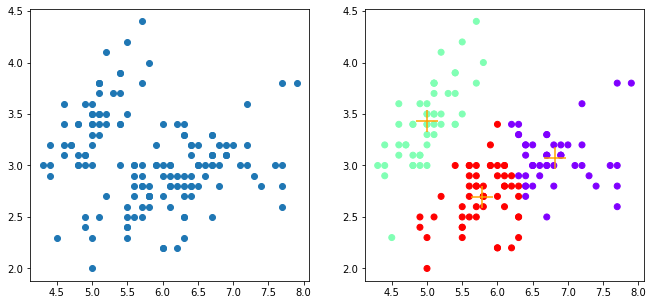

In [8]:
#Graficando el resultado
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:, 0], X[:, 1])
axes[1].scatter(X[:,0], X[:,1], c = modelo_kmean.labels_, cmap='rainbow')
axes[1].scatter(modelo_kmean.cluster_centers_[:,0], modelo_kmean.cluster_centers_[:,1], marker="+", s=500, c='orange')
plt.show()

Usando 2 y 5 clusters.

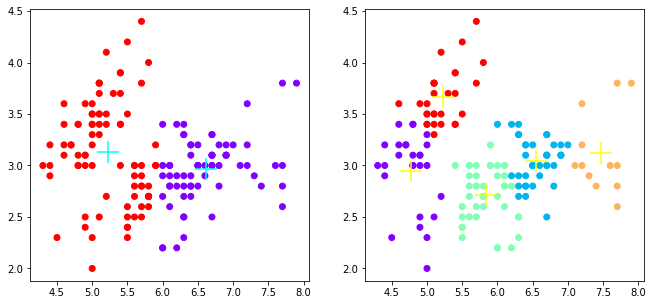

In [9]:
#Graficando el resultado con 2 y 5 clusters
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], c = modelo_kmean_2.labels_, cmap='rainbow')
axes[0].scatter(modelo_kmean_2.cluster_centers_[:,0], modelo_kmean_2.cluster_centers_[:,1], marker="+", s=500, c='cyan')
axes[1].scatter(X[:,0], X[:,1], c = modelo_kmean_5.labels_, cmap='rainbow')
axes[1].scatter(modelo_kmean_5.cluster_centers_[:,0], modelo_kmean_5.cluster_centers_[:,1], marker="+", s=500, c='yellow')

## Usando agrupamiento jerarquico aglomerativo

In [10]:
#Obteniendo dendrograma
linked_complete = linkage(X, 'complete')

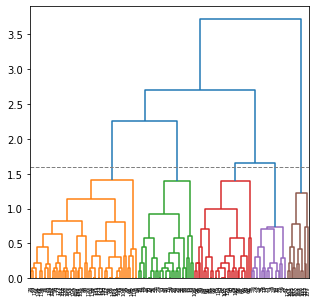

In [11]:
#Graficando dendrograma
plt.figure(figsize=(5, 5))
dendrogram(linked_complete,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           color_threshold=1.6)
plt.axhline(y=1.6, c='grey', lw=1, linestyle='dashed')
plt.show()

Aquí en el dendrograma superior se actualizó agregando una linea que toma los 5 clusters identificados en el indice silhouette como información extra.

In [21]:
#Definiendo el rango e inicializando el arreglo de silhouette
rango_de_grupos = range(2, 10)

In [23]:
val_silhouette = []
for num_clusters in rango_de_grupos:
    modelo = AgglomerativeClustering(
        affinity='euclidean',
        linkage='complete',
        n_clusters=num_clusters
    )

    etiquetas_cluster = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, etiquetas_cluster)
    val_silhouette.append(silhouette_avg)

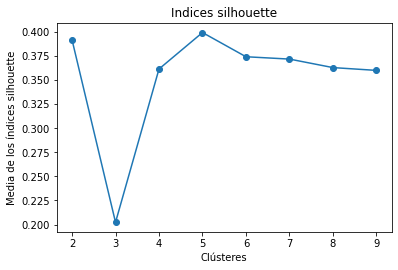

In [24]:
#Graficando los indices silhouette
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(rango_de_grupos, val_silhouette, marker='o')
ax.set_title("Indices silhouette")
ax.set_xlabel('Clústeres')
ax.set_ylabel('Media de los índices silhouette');

**Comentarios**
Aquí podemos notar gracias al índice silhouette que obtenemos un mejor rendimiento con 5 clusters

## Usando C-Means Difuso

In [25]:
#Creando el modelo definiendo los cluster iniciales basado en el resultado del índice de silhouette
fcm = FCM(num_clusters = 5)

In [26]:
#Entrenando el modelo
fcm.fit(X)

In [27]:
#Obteniendo los centroides yejecutando las predicciones
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

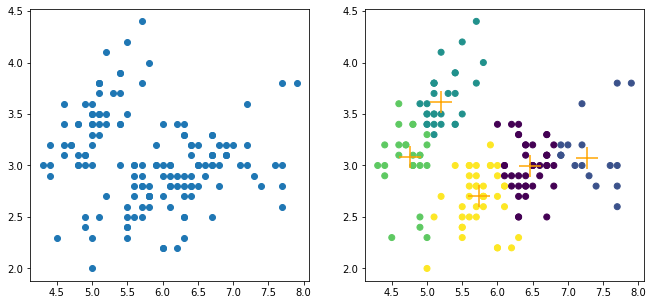

In [30]:
#Graficando los resultados
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1])
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='orange')
plt.show()

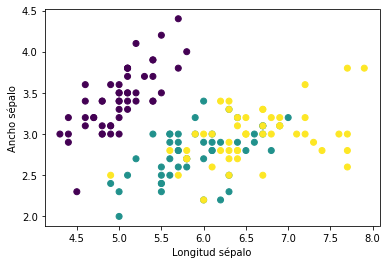

In [29]:
#Imprimiendo los datos originales por tipo de flor
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Longitud sépalo")
plt.ylabel("Ancho sépalo")
plt.show()

## Graficando K-Means y C-Means Difuso
 * Centros de K-Means: Amarillo
 * Centros de C-Means difuso: Cyan

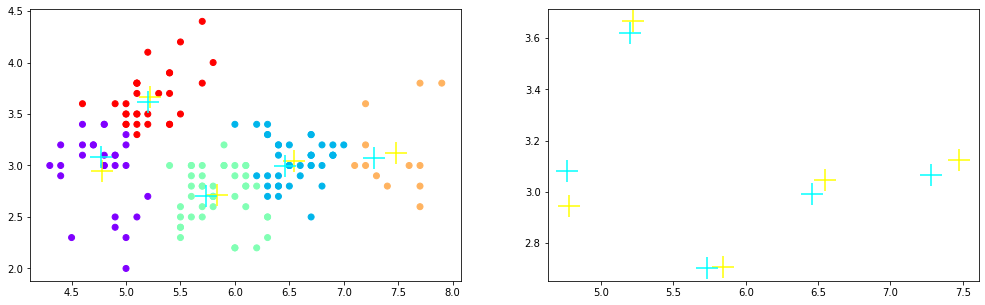

In [31]:
#Graficando los reaultados 2 y 4 con los centroides de cada uno

f, axes = plt.subplots(1, 2, figsize=(17,5))
axes[0].scatter(X[:,0], X[:,1], c = modelo_kmean_5.labels_, cmap='rainbow')
axes[0].scatter(modelo_kmean_5.cluster_centers_[:,0], modelo_kmean_5.cluster_centers_[:,1], marker="+", s=500, c='yellow')
axes[0].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='cyan')
axes[1].scatter(modelo_kmean_5.cluster_centers_[:,0], modelo_kmean_5.cluster_centers_[:,1], marker="+", s=500, c='yellow')
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='cyan')

**Conclusiones generales**
Podemos notar usando ambos métodos de K-Means y C-Means Difuso que dentro de este tipo de datos es que se puede notar que el K-Means al ser un modelo mas estricto al categorizar en diferentes cluster perdemos un poco la flexibilidad de incluir posibles datos que deberían estar en alguno de los clusters. En el caso de C-Means esa posibilidad queda abierta al ser probabilístico y permitir la posibilidad de que algun punto pertenezca a más de un cluster.
Dentro de este mismo tenor en este caso conocemos los 3 features en los que se categoriza el conjunto de datos como lo es el tipo de flor por lo que en este caso sabemos con K-Means que podemos pedir 3 clusters que serán muy aproximados a los de los datos proporcionados.
Ambos métodos tienen estas ventajas y desventajas, quizá para este caso el algoritmo de K-Means pueda resultar una mejor aproximación a la agrupación de features en este conjunto de datos.